In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pertanianmultinomial/Pertanianemitten.csv
/kaggle/input/pertanianmultinomial/uas.csv
/kaggle/input/pertanianmultinomial/PertanianMultinomial (1).csv
/kaggle/input/pertanianmultinomial/PertanianMultinomial.csv


In [2]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt



import statsmodels.api as sm

# readable figures
pd.set_option('float_format', '{:f}'.format)

In [3]:
df = pd.read_csv('../input/pertanianmultinomial/uas.csv')
df.head()

,DER,Operating Profit Margin,Sales Growth,Return On Asset,Category
0,0.135154,0.135154,1.293241,0.064848,1
1,0.758859,-0.064557,0.834610,-0.064974,1
2,0.395062,0.236027,1.625789,0.061328,2
3,0.000624,0.227386,0.797727,0.119392,1
4,1.239184,-2.007213,1.451510,-0.059932,4


In [4]:
df.describe()

,DER,Operating Profit Margin,Sales Growth,Return On Asset,Category
count,19.000000,19.000000,19.000000,19.000000,19.000000
mean,1.677137,-0.033534,1.251155,0.033923,1.789474
std,2.615720,0.572822,0.325129,0.119803,1.134262
min,-1.322743,-2.007213,0.637814,-0.178472,1.000000
25%,0.443561,-0.013364,1.056122,-0.040850,1.000000
50%,0.758859,0.150501,1.279567,0.043147,1.000000
75%,1.542588,0.231707,1.404820,0.073551,2.000000
max,10.614012,0.458206,1.898171,0.405886,4.000000


In [5]:
display(df)

,DER,Operating Profit Margin,Sales Growth,Return On Asset,Category
0,0.135154,0.135154,1.293241,0.064848,1
1,0.758859,-0.064557,0.834610,-0.064974,1
2,0.395062,0.236027,1.625789,0.061328,2
3,0.000624,0.227386,0.797727,0.119392,1
4,1.239184,-2.007213,1.451510,-0.059932,4
5,3.517208,-0.412206,1.336419,-0.116518,1
6,5.083353,0.331290,1.055429,0.405886,2
7,0.755672,0.193574,1.063529,0.053030,4
8,0.624000,-0.031987,1.056816,-0.026476,1
9,10.614012,0.005259,0.637814,-0.055224,1


In [6]:
x = df.drop('Category', axis=1)
x.head()

,DER,Operating Profit Margin,Sales Growth,Return On Asset
0,0.135154,0.135154,1.293241,0.064848
1,0.758859,-0.064557,0.834610,-0.064974
2,0.395062,0.236027,1.625789,0.061328
3,0.000624,0.227386,0.797727,0.119392
4,1.239184,-2.007213,1.451510,-0.059932


In [7]:
y = df['Category']
y.head()

0    1
1    1
2    2
3    1
4    4
Name: Category, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
x_scaled = StandardScaler().fit_transform(x)
data_scaled = pd.DataFrame(x_scaled, columns=df.columns.drop(['Category']))

data_scaled

,DER,Operating Profit Margin,Sales Growth,Return On Asset
0,-0.605660,0.302556,0.132992,0.265199
1,-0.360681,-0.055641,-1.316275,-0.848118
2,-0.503573,0.483478,1.183837,0.235018
3,-0.658501,0.467982,-1.432826,0.732960
4,-0.172019,-3.539949,0.633118,-0.804882
5,0.722743,-0.679179,0.269431,-1.290151
6,1.337893,0.654342,-0.618493,3.189864
7,-0.361933,0.407337,-0.592895,0.163851
8,-0.413651,0.002774,-0.614107,-0.517969
9,3.510225,0.069579,-1.938146,-0.764511


In [9]:
display(df)

,DER,Operating Profit Margin,Sales Growth,Return On Asset,Category
0,0.135154,0.135154,1.293241,0.064848,1
1,0.758859,-0.064557,0.834610,-0.064974,1
2,0.395062,0.236027,1.625789,0.061328,2
3,0.000624,0.227386,0.797727,0.119392,1
4,1.239184,-2.007213,1.451510,-0.059932,4
5,3.517208,-0.412206,1.336419,-0.116518,1
6,5.083353,0.331290,1.055429,0.405886,2
7,0.755672,0.193574,1.063529,0.053030,4
8,0.624000,-0.031987,1.056816,-0.026476,1
9,10.614012,0.005259,0.637814,-0.055224,1


In [10]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3)

In [11]:
mnlogit_mod = sm.MNLogit(y,sm.add_constant(data_scaled))
mnlogit_fit = mnlogit_mod.fit(method='bfgs')

print (mnlogit_fit.summary())

         Current function value: 0.430729
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                          MNLogit Regression Results                          
Dep. Variable:               Category   No. Observations:                   19
Model:                        MNLogit   Df Residuals:                        4
Method:                           MLE   Df Model:                           12
Date:                Fri, 08 Jul 2022   Pseudo R-squ.:                  0.6052
Time:                        12:22:44   Log-Likelihood:                -8.1838
converged:                      False   LL-Null:                       -20.726
Covariance Type:            nonrobust   LLR p-value:                   0.01442
             Category=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -5.1899      7.243     

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [12]:
logistic_regresion = LogisticRegression(multi_class='auto').fit(x,y)
y_pred = logistic_regresion.predict(testX)
y_pred

array([1, 1, 1, 1, 1, 1])

In [13]:
print('Intercept :', logistic_regresion.intercept_)

Intercept : [ 2.49178354 -0.68975265 -1.4137104  -0.38832049]


In [14]:
print(logistic_regresion.coef_)

[[-0.0564982   0.55415044 -0.8699763  -0.24767687]
 [ 0.06356312  0.59426194  0.65731372  0.38198184]
 [ 0.15997589 -0.5956054  -0.18261227 -0.16265114]
 [-0.16704082 -0.55280698  0.39527485  0.02834617]]


In [15]:
prediction_test = logistic_regresion.predict(testX)

In [16]:
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(testY, y_pred)))

Accuracy: 0.50
Error rate: 0.50


In [17]:
confusion_matrix = confusion_matrix(testY, y_pred)
print(confusion_matrix)

[[3 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


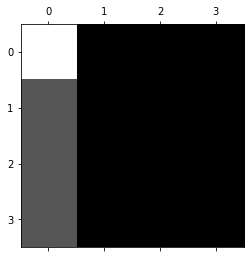

In [18]:
plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()

In [19]:
probability = logistic_regresion.predict_proba(testX)
probability

array([[0.53450454, 0.13029063, 0.13884874, 0.19635609],
       [0.43554401, 0.32577703, 0.03769043, 0.20098852],
       [0.69327229, 0.16668177, 0.0274534 , 0.11259255],
       [0.73668688, 0.1147697 , 0.03322568, 0.11531774],
       [0.57960614, 0.22023849, 0.17807091, 0.02208447],
       [0.65253461, 0.16006266, 0.01876576, 0.16863698]])

In [20]:
print(probability.shape[0])
print(testX.shape[0])

6
6


In [21]:
#data_result = pd.DataFrame(logistic_regresion.coef_, columns=x.columns)
#data_result['intercept'] = log_reg_result.intercept_
#data_result['class'] = logistic_regresion.classes_

#data_result

In [22]:
data_result = pd.DataFrame(logistic_regresion.predict_proba(testX), columns=logistic_regresion.classes_)
data_result

,1,2,3,4
0,0.534505,0.130291,0.138849,0.196356
1,0.435544,0.325777,0.037690,0.200989
2,0.693272,0.166682,0.027453,0.112593
3,0.736687,0.114770,0.033226,0.115318
4,0.579606,0.220238,0.178071,0.022084
5,0.652535,0.160063,0.018766,0.168637


In [23]:
data_result['sum'] = data_result.sum(axis=1)
data_result

,1,2,3,4,sum
0,0.534505,0.130291,0.138849,0.196356,1.000000
1,0.435544,0.325777,0.037690,0.200989,1.000000
2,0.693272,0.166682,0.027453,0.112593,1.000000
3,0.736687,0.114770,0.033226,0.115318,1.000000
4,0.579606,0.220238,0.178071,0.022084,1.000000
5,0.652535,0.160063,0.018766,0.168637,1.000000


In [24]:
data_result['predicted_class'] = y_pred
data_result

,1,2,3,4,sum,predicted_class
0,0.534505,0.130291,0.138849,0.196356,1.000000,1
1,0.435544,0.325777,0.037690,0.200989,1.000000,1
2,0.693272,0.166682,0.027453,0.112593,1.000000,1
3,0.736687,0.114770,0.033226,0.115318,1.000000,1
4,0.579606,0.220238,0.178071,0.022084,1.000000,1
5,0.652535,0.160063,0.018766,0.168637,1.000000,1


In [25]:
data_result['actual_class'] = testY.to_frame().reset_index().drop(columns='index')
data_result

,1,2,3,4,sum,predicted_class,actual_class
0,0.534505,0.130291,0.138849,0.196356,1.000000,1,3
1,0.435544,0.325777,0.037690,0.200989,1.000000,1,2
2,0.693272,0.166682,0.027453,0.112593,1.000000,1,4
3,0.736687,0.114770,0.033226,0.115318,1.000000,1,1
4,0.579606,0.220238,0.178071,0.022084,1.000000,1,1
5,0.652535,0.160063,0.018766,0.168637,1.000000,1,1


In [26]:
le = preprocessing.LabelEncoder()

data_result['label_pred'] = le.fit_transform(data_result['predicted_class'])
data_result['label_actual'] = le.fit_transform(data_result['actual_class'])
data_result

,1,2,3,4,sum,predicted_class,actual_class,label_pred,label_actual
0,0.534505,0.130291,0.138849,0.196356,1.000000,1,3,0,2
1,0.435544,0.325777,0.037690,0.200989,1.000000,1,2,0,1
2,0.693272,0.166682,0.027453,0.112593,1.000000,1,4,0,3
3,0.736687,0.114770,0.033226,0.115318,1.000000,1,1,0,0
4,0.579606,0.220238,0.178071,0.022084,1.000000,1,1,0,0
5,0.652535,0.160063,0.018766,0.168637,1.000000,1,1,0,0


In [27]:
targets = data_result['predicted_class']   
integerEncoded = le.fit_transform(targets)
integerMapping=dict(zip(targets,integerEncoded))
integerMapping

{1: 0}

In [28]:
targets = data_result['actual_class']   
integerEncoded = le.fit_transform(targets)
integerMapping=dict(zip(targets,integerEncoded))
integerMapping

{3: 2, 2: 1, 4: 3, 1: 0}

In [29]:
data_result['check'] = data_result['label_actual'] - data_result['label_pred']
data_result

,1,2,3,4,sum,predicted_class,actual_class,label_pred,label_actual,check
0,0.534505,0.130291,0.138849,0.196356,1.000000,1,3,0,2,2
1,0.435544,0.325777,0.037690,0.200989,1.000000,1,2,0,1,1
2,0.693272,0.166682,0.027453,0.112593,1.000000,1,4,0,3,3
3,0.736687,0.114770,0.033226,0.115318,1.000000,1,1,0,0,0
4,0.579606,0.220238,0.178071,0.022084,1.000000,1,1,0,0,0
5,0.652535,0.160063,0.018766,0.168637,1.000000,1,1,0,0,0


In [30]:
data_result['correct_prediction?'] = np.where(data_result['check'] == 0, 'True', 'False')
data_result = data_result.drop(['label_pred', 'label_actual', 'check'], axis=1)
data_result

,1,2,3,4,sum,predicted_class,actual_class,correct_prediction?
0,0.534505,0.130291,0.138849,0.196356,1.000000,1,3,False
1,0.435544,0.325777,0.037690,0.200989,1.000000,1,2,False
2,0.693272,0.166682,0.027453,0.112593,1.000000,1,4,False
3,0.736687,0.114770,0.033226,0.115318,1.000000,1,1,True
4,0.579606,0.220238,0.178071,0.022084,1.000000,1,1,True
5,0.652535,0.160063,0.018766,0.168637,1.000000,1,1,True


In [31]:
display(data_result)

,1,2,3,4,sum,predicted_class,actual_class,correct_prediction?
0,0.534505,0.130291,0.138849,0.196356,1.000000,1,3,False
1,0.435544,0.325777,0.037690,0.200989,1.000000,1,2,False
2,0.693272,0.166682,0.027453,0.112593,1.000000,1,4,False
3,0.736687,0.114770,0.033226,0.115318,1.000000,1,1,True
4,0.579606,0.220238,0.178071,0.022084,1.000000,1,1,True
5,0.652535,0.160063,0.018766,0.168637,1.000000,1,1,True


In [32]:
true_predictions = data_result[(data_result["correct_prediction?"] == 'True')].shape[0]
false_predictions = data_result[(data_result["correct_prediction?"] == 'False')].shape[0]
total = data_result["correct_prediction?"].shape[0]

print('manual calculated Accuracy is:', (true_predictions / total * 100))

manual calculated Accuracy is: 50.0


In [33]:
wrong_pred = data_result[(data_result["correct_prediction?"] == 'False')]
wrong_pred

,1,2,3,4,sum,predicted_class,actual_class,correct_prediction?
0,0.534505,0.130291,0.138849,0.196356,1.000000,1,3,False
1,0.435544,0.325777,0.037690,0.200989,1.000000,1,2,False
2,0.693272,0.166682,0.027453,0.112593,1.000000,1,4,False


In [34]:
x2 = sm.add_constant(data_scaled, prepend = False)

mnlogit_mod = sm.MNLogit(y, x2).fit(method='bfgs')

print (mnlogit_mod.summary())

         Current function value: 0.430729
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                          MNLogit Regression Results                          
Dep. Variable:               Category   No. Observations:                   19
Model:                        MNLogit   Df Residuals:                        4
Method:                           MLE   Df Model:                           12
Date:                Fri, 08 Jul 2022   Pseudo R-squ.:                  0.6052
Time:                        12:22:46   Log-Likelihood:                -8.1838
converged:                      False   LL-Null:                       -20.726
Covariance Type:            nonrobust   LLR p-value:                   0.01442
             Category=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
DER                        -3.4108      8.660     

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
